In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import math

# Define functions 

In [2]:
# -------- epair ------------
def get_new_psi_pairprod_exp(E, E_, rnd_state, is_degree=True):
    n = -1
    a = 8.9e-4
    b = 1.5e-5
    c = 0.032
    d = 1
    e = 0.1
    m = 105.7 / 1e3 # in GeV
    m_e =   0.5110 / 1e3 # in GeV
    nu = (E - E_) / (E - m)
    minimum = np.min([a * nu**(1/4) * (1 + b*E) + c * nu / (nu + d), e])
    rms_theta = (2.3 + np.log(E)) * (1- nu)**n / E * (nu - 2 * m_e/E)**2 / nu**2 * minimum
    ### theta = abs(rnd_state.normal(0, rms_theta/np.sqrt(2), 1)[0])
    ### theta = rnd_state.normal(rms_theta**2, rms_theta, 1)[0]
    theta_muon = np.sqrt(rnd_state.exponential(rms_theta**2))
    # theta_muon = rnd_state.exponential(rms_theta)
    ### theta_real = abs(theta - rms_theta**2)
    if is_degree:
        return np.rad2deg(theta_muon)
    else:
        return theta_muon

In [3]:
E_i = 1e9 # in GeV  
E_f = 1e8 # in GeV 

rnd_state = np.random.RandomState(3)

angle_1 = get_new_psi_pairprod_exp(E_i, E_f, rnd_state, is_degree=False)
print('angle in rad: ', angle_1) 
print('cos(angle): ', np.cos(angle_1))

angle in rad:  2.059626912031178e-08
cos(angle):  0.9999999999999998


In [4]:
E_i = 1e9 # in GeV  
E_f = 2e8 # in GeV 

rnd_state = np.random.RandomState(3)

angle_2 = get_new_psi_pairprod_exp(E_i, E_f, rnd_state, is_degree=False)
print('angle in rad: ', angle_2) 
print('cos(angle): ', np.cos(angle_2))

angle in rad:  1.0298134554710396e-08
cos(angle):  1.0


Text(0.5, 0, 'deflection in rad')

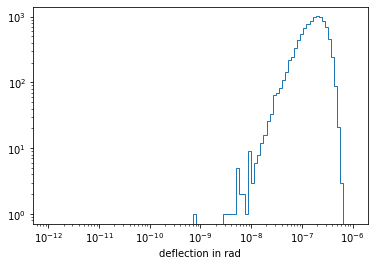

In [5]:
n_events = 10000
E_i = 1e8 * np.ones(n_events)# in GeV  
E_f = 1e7 * np.ones(n_events)# in GeV 

rnd_state = np.random.RandomState(3)

angles = [get_new_psi_pairprod_exp(E_i, E_f, rnd_state, is_degree=False) for E_i, E_f in zip(E_i, E_f)]
# print('angles in rad: ', angles) 
# print('angles inprint('cos(angle): ', np.cos(angles))
plt.hist(angles, bins=np.logspace(-12, -6, 100), histtype='step')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('deflection in rad')

10000.0


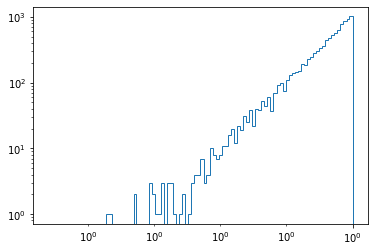

In [6]:
n, x, _ = plt.hist(np.cos(angles), bins=np.logspace(-1e-13, 0, 101), histtype='step')
plt.xscale('log')
plt.yscale('log')
print(np.sum(n))

In [7]:
angle_2

1.0298134554710396e-08

In [8]:
angle_2 * np.tan(angle_2)

1.0605157530692029e-16

In [9]:
np.cos(angle_2)

1.0

In [10]:
np.cos(2 * angle_2) 

0.9999999999999998

In [11]:
np.cos(angle_1 * 2) - angle_1/2 * np.sin(angle_1 * 2)

0.9999999999999987

In [12]:
np.cos(angle_1)

0.9999999999999998

In [13]:
10 * 1 - 9 * 1

1

In [14]:
10 * 0.3 - 9 * 0.3

0.30000000000000027

In [15]:
np.cos(10) + 9 * np.sin(10)

-5.73526152708078

In [16]:
np.cos(1)

0.5403023058681398

In [17]:
np.sin(angle_2 * 0.000001)

1.0298134554710396e-14

In [18]:
1 - 2 * np.sin(angle_1 / 2)**2 == np.cos(angle_1)

True

In [19]:
1 - 2 * np.sin(angle_2 / 2)**2 == np.cos(angle_2)

True

In [20]:
np.cos(angle_2)

1.0

In [21]:
1 - 2 * np.sin(angle_2 / 2)**2

1.0

In [22]:
np.sin(angle_2 / 2)**2 * 2

5.3025787653460147e-17

In [23]:
def cos_sum(t, N=1000):
    return np.sum([(-1)**n / math.factorial(2 * n) * t**(2 * n) for n in range(N)])
cos_sum(angle_2)

1.0

In [ ]:
np.cos(angle_2)

/home/pgutjahr/proposal_env/lib64/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log


(array([3.232e+03, 9.080e+02, 3.020e+02, 8.600e+01, 2.300e+01, 2.000e+00,
        4.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([4.65020995e+02, 5.73697804e+06, 1.14734911e+07, 1.72100041e+07,
        2.29465171e+07, 2.86830301e+07, 3.44195431e+07, 4.01560561e+07,
        4.58925692e+07, 5.16290822e+07, 5.73655952e+07]),
 <BarContainer object of 10 artists>)

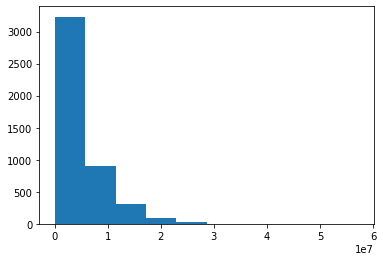

In [59]:
# -------- epair ------------
def get_new_psi_pairprod_exp_self(E, E_, rnd_state, is_degree=True):
    n = -1
    a = 8.9e-4
    b = 1.5e-5
    c = 0.032
    d = 1
    e = 0.1
    m = 105.7 / 1e3 # in GeV
    m_e =   0.5110 / 1e3 # in GeV
    nu = (E - E_) / (E - m)
    minimum = np.min([a * nu**(1/4) * (1 + b*E) + c * nu / (nu + d), e])
    rms_theta = (2.3 + np.log(E)) * (1- nu)**n / E * (nu - 2 * m_e/E)**2 / nu**2 * minimum

    # theta_muon = np.sqrt(rnd_state.exponential(rms_theta**2))
    
    y = rnd_state.uniform(0, 1)
    cos_theta = exp_cos(rms_theta, y)
    return cos_theta
    
def exp_cos(l, y):
    return - np.log(1 - np.arccos(y)**2) / l


test = [get_new_psi_pairprod_exp_self(E_i[0], E_f[0], rnd_state) for i in range(n_events)]
plt.hist(test)

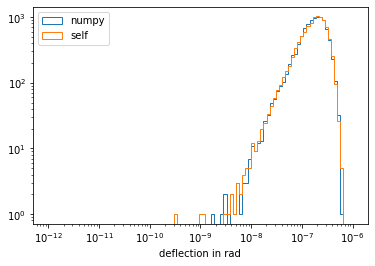

In [87]:
# -------- epair ------------
def get_new_psi_pairprod_exp_02(E, E_, rnd_state, is_degree=True):
    n = -1
    a = 8.9e-4
    b = 1.5e-5
    c = 0.032
    d = 1
    e = 0.1
    m = 105.7 / 1e3 # in GeV
    m_e =   0.5110 / 1e3 # in GeV
    nu = (E - E_) / (E - m)
    minimum = np.min([a * nu**(1/4) * (1 + b*E) + c * nu / (nu + d), e])
    rms_theta = (2.3 + np.log(E)) * (1- nu)**n / E * (nu - 2 * m_e/E)**2 / nu**2 * minimum

    # theta_muon = np.sqrt(rnd_state.exponential(rms_theta**2))
    
    rnd = rnd_state.uniform(0, 1)
    theta_muon = np.sqrt(f_exp(1/rms_theta**2, rnd))
    
    if is_degree:
        return np.rad2deg(theta_muon)
    else:
        return theta_muon

def f_exp(l, y):
    return - np.log(1 - y) / l


angles_02 = [get_new_psi_pairprod_exp_02(E_i, E_f, rnd_state, is_degree=False) for E_i, E_f in zip(E_i, E_f)]
angles = [get_new_psi_pairprod_exp(E_i, E_f, rnd_state, is_degree=False) for E_i, E_f in zip(E_i, E_f)]

# print('angles in rad: ', angles) 
# print('angles inprint('cos(angle): ', np.cos(angles))
plt.hist(angles, bins=np.logspace(-12, -6, 100), histtype='step', label='numpy')
plt.hist(angles_02, bins=np.logspace(-12, -6, 100), histtype='step', label='self')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('deflection in rad')
plt.legend(loc='upper left')

/home/pgutjahr/proposal_env/lib64/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log


10000.0
8941.0


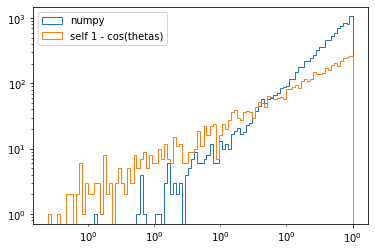

In [125]:
# -------- epair ------------
def get_new_psi_pairprod_exp_03(E, E_, rnd_state):
    n = -1
    a = 8.9e-4
    b = 1.5e-5
    c = 0.032
    d = 1
    e = 0.1
    m = 105.7 / 1e3 # in GeV
    m_e =   0.5110 / 1e3 # in GeV
    nu = (E - E_) / (E - m)
    minimum = np.min([a * nu**(1/4) * (1 + b*E) + c * nu / (nu + d), e])
    rms_theta = (2.3 + np.log(E)) * (1- nu)**n / E * (nu - 2 * m_e/E)**2 / nu**2 * minimum

    # theta_muon = np.sqrt(rnd_state.exponential(rms_theta**2))
    
    rnd = rnd_state.uniform(0, 1)
    cos_theta = cos_exp(1/rms_theta**2, rnd)
    
    return cos_theta

def cos_exp(l, y):
    return - np.log(1 - np.arccos(y)**2) / l


cos_thetas = [get_new_psi_pairprod_exp_03(E_i, E_f, rnd_state) for E_i, E_f in zip(E_i, E_f)]
# print(cos_thetas)
n, x, _ = plt.hist(np.cos(angles), bins=np.logspace(-1e-13, 0, 101), histtype='step', label='numpy')
plt.hist(1 - np.array(cos_thetas), bins=np.logspace(-1e-13, 0, 101), histtype='step', label='self 1 - cos(thetas)')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left')
print(np.sum(n))
print(np.sum(n[:-1]))

In [121]:
print(cos_thetas)

[nan, nan, nan, nan, 1.6616694117320134e-14, nan, nan, nan, nan, nan, 8.888498675086406e-15, nan, 1.3561118256094965e-14, nan, nan, 5.636954321193506e-14, nan, 1.7425246934526184e-14, nan, 6.586736413890362e-14, nan, 2.9546226867136325e-14, 3.712728235458035e-14, 3.042435117355068e-14, nan, 2.2932152624347056e-14, nan, nan, 5.9182835502034004e-15, nan, nan, nan, nan, 2.5334911913798806e-14, 9.045076359560286e-14, 8.877952407723247e-15, nan, 1.386519851052773e-14, nan, nan, 1.8172785419093362e-14, nan, 1.779016678388953e-14, nan, nan, nan, 2.930411590085413e-14, nan, 3.0769849678452245e-15, nan, nan, nan, 1.3449301719835914e-14, nan, 3.2177486958673387e-13, nan, nan, nan, nan, nan, nan, 3.220270502042542e-15, 1.0395816054299576e-13, nan, 1.0143604674367788e-13, nan, nan, nan, 1.8080307695380413e-14, 7.839823584038408e-15, nan, 6.944439614869082e-14, nan, nan, nan, 3.071089334745639e-14, 5.2840904910075985e-14, 1.7287003255399202e-13, 2.957306165200238e-13, nan, nan, nan, nan, 1.10794565

(array([2.968e+03, 1.022e+03, 3.490e+02, 1.680e+02, 5.000e+01, 2.300e+01,
        4.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.52020993e-17, 4.06777594e-14, 8.13403168e-14, 1.22002874e-13,
        1.62665431e-13, 2.03327989e-13, 2.43990546e-13, 2.84653103e-13,
        3.25315661e-13, 3.65978218e-13, 4.06640775e-13]),
 <BarContainer object of 10 artists>)

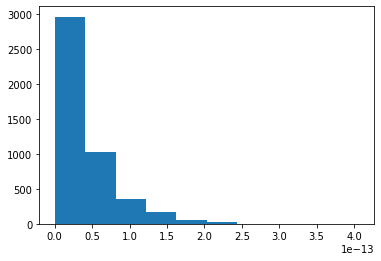

In [122]:
plt.hist(cos_thetas)

(array([1.000e+00, 6.000e+00, 1.200e+01, 3.400e+01, 6.900e+01, 1.430e+02,
        3.950e+02, 9.280e+02, 2.426e+03, 5.986e+03]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 <BarContainer object of 10 artists>)

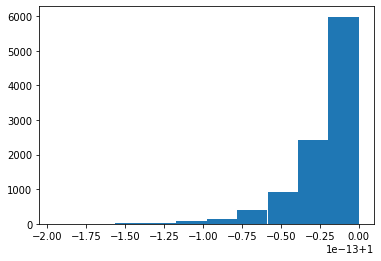

In [123]:
plt.hist(np.cos(angles))

In [116]:
l = []
for i in range(10000):
    l.append(np.isnan(cos_thetas[i]))
np.sum(l)

5412

In [108]:
np.array(cos_thetas)[np.array(cos_thetas)!=np.nan]

/home/pgutjahr/proposal_env/lib64/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


array([[           nan,            nan,            nan, ...,
        1.96382664e-14, 3.82448715e-14,            nan]])

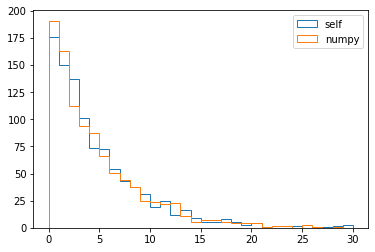

In [84]:
### test
def f(l, y):
    return - np.log(1 -y) / l

l = 1/5
test = [] 
while len(test) < 1000:
    rnd = rnd_state.uniform(0, 1)
    test.append(f(l, rnd))
plt.hist(test, bins=np.linspace(0, 30, 31), histtype='step', label='self')
plt.hist(rnd_state.exponential(1/l, size=1000), bins=np.linspace(0, 30, 31), histtype='step', label='numpy')
plt.legend()